Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.



1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

# KNN, a distance based classifier
from sklearn.neighbors import KNeighborsClassifier
# scaling objects:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import env
import os
import explore
import wrangle 

In [2]:
from wrangle import wrangle_zillow

In [3]:
train, validate, test = wrangle_zillow()

this file exists, reading csv


In [4]:
train.head()

,bedrooms,bathrooms,square_feet,home_value,yearbuilt,tax,county
462820,5,4.0,3011,710674.0,2005,7561.14,Ventura
3880,3,2.0,1682,603333.0,1961,7086.19,LA
992263,4,2.0,1433,82804.0,1954,1134.83,LA
311722,3,2.5,2001,355444.0,1999,4174.92,Ventura
787985,4,2.0,2277,571000.0,1962,7113.02,LA


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1284141 entries, 462820 to 778196
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   bedrooms     1284141 non-null  int64  
 1   bathrooms    1284141 non-null  float64
 2   square_feet  1284141 non-null  int64  
 3   home_value   1284141 non-null  float64
 4   yearbuilt    1284141 non-null  int64  
 5   tax          1284141 non-null  float64
 6   county       1284141 non-null  object 
dtypes: float64(3), int64(3), object(1)
memory usage: 78.4+ MB


In [6]:
#encode for modeling
train = pd.concat([train, pd.get_dummies(train["county"])], axis=1)
validate = pd.concat([validate, pd.get_dummies(validate["county"])], axis=1)
test = pd.concat([test, pd.get_dummies(test["county"])], axis=1)

In [7]:
# Drop the original 'county' column
train = train.drop("county", axis=1)
validate = validate.drop("county", axis=1)
test = test.drop("county", axis=1)

In [8]:
#rename for modeling
train.rename(
        columns={"LA": "los_angeles", "Orange": "orange", "Ventura": "ventura"},
        inplace=True,
    )

validate.rename(
        columns={"LA": "los_angeles", "Orange": "orange", "Ventura": "ventura"},
        inplace=True,
    )

test.rename(
        columns={"LA": "los_angeles", "Orange": "orange", "Ventura": "ventura"},
        inplace=True,
    )

In [9]:
train.head()

,bedrooms,bathrooms,square_feet,home_value,yearbuilt,tax,los_angeles,orange,ventura
462820,5,4.0,3011,710674.0,2005,7561.14,False,False,True
3880,3,2.0,1682,603333.0,1961,7086.19,True,False,False
992263,4,2.0,1433,82804.0,1954,1134.83,True,False,False
311722,3,2.5,2001,355444.0,1999,4174.92,False,False,True
787985,4,2.0,2277,571000.0,1962,7113.02,True,False,False


In [10]:
X_train, X_validate, X_test = train[['square_feet', 'bathrooms','yearbuilt', 'los_angeles','orange','ventura']],\
                              validate[['square_feet','bathrooms', 'yearbuilt', 'los_angeles', 'orange','ventura']],\
                              test[['square_feet','bathrooms', 'yearbuilt', 'los_angeles', 'orange','ventura']]
y_train, y_validate, y_test = train.home_value, validate.home_value, test.home_value


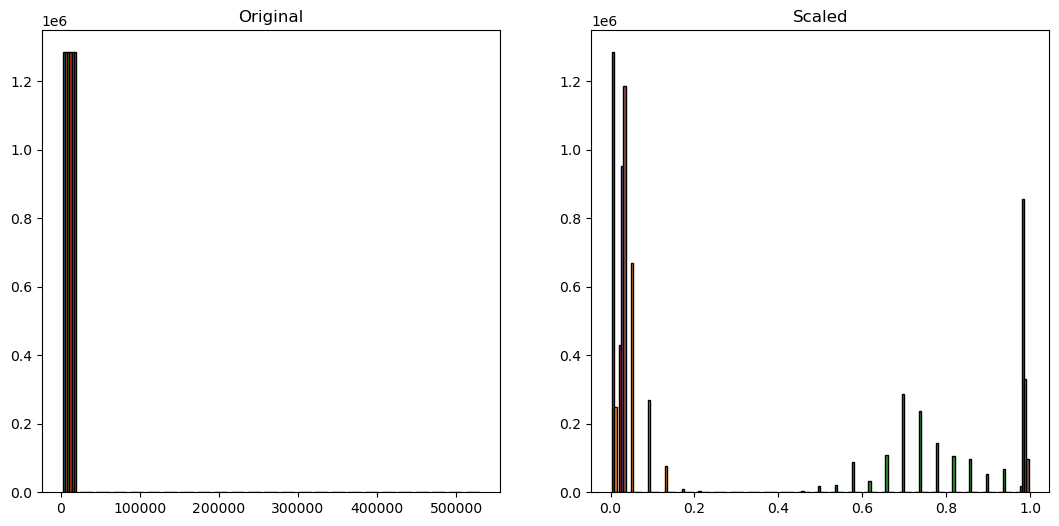

In [17]:
#MinMax Scaler

scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled');


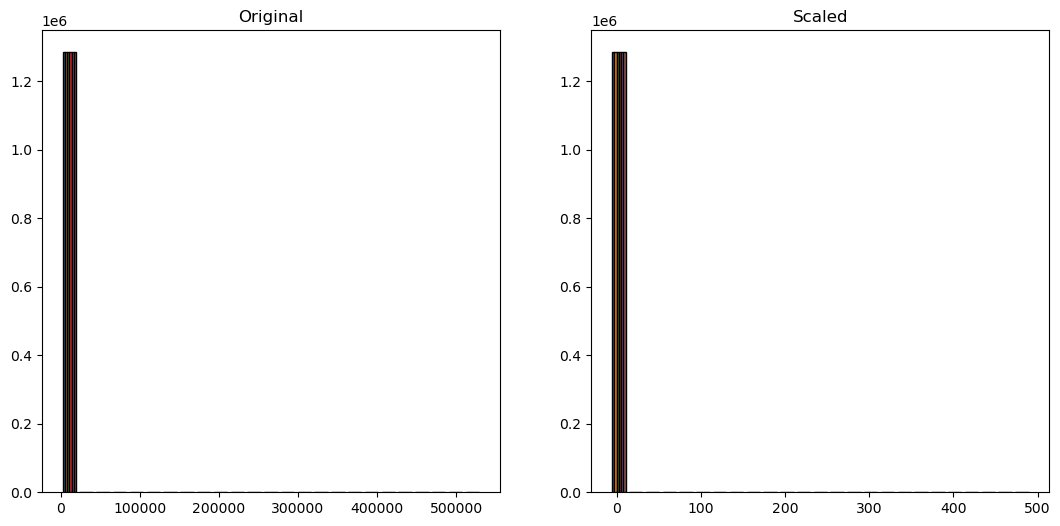

In [16]:
#Standard Scaler

scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled');

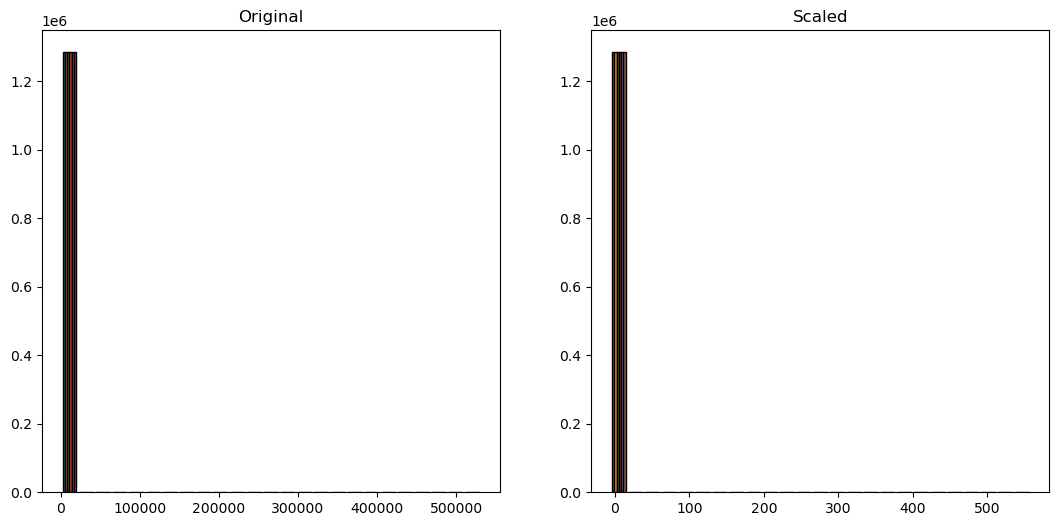

In [18]:
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled');

2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


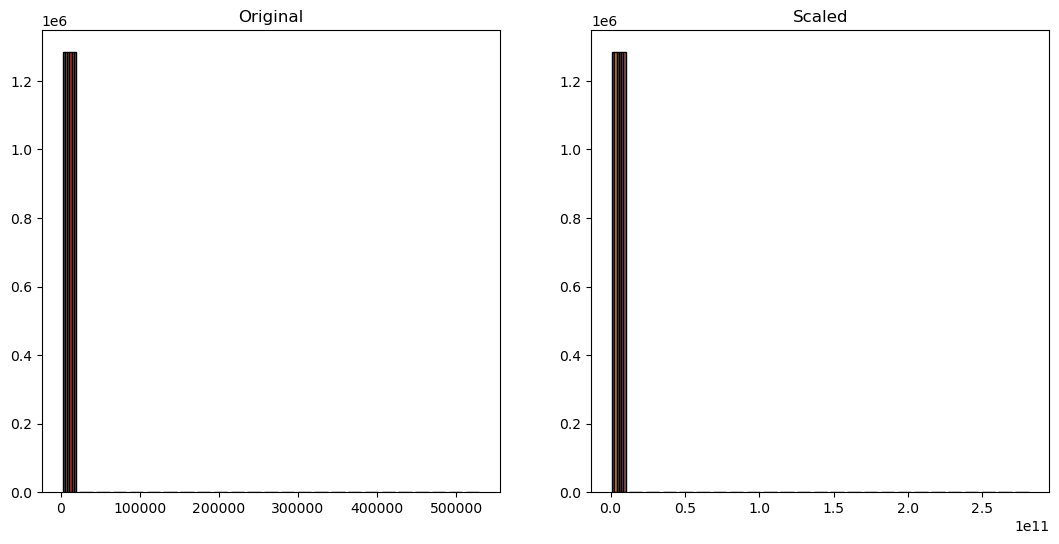

In [19]:
#MinMax Scaler

scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.inverse_transform(X_train)
X_validate_scaled = scaler.inverse_transform(X_validate)
X_test_scaled = scaler.inverse_transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled');


3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


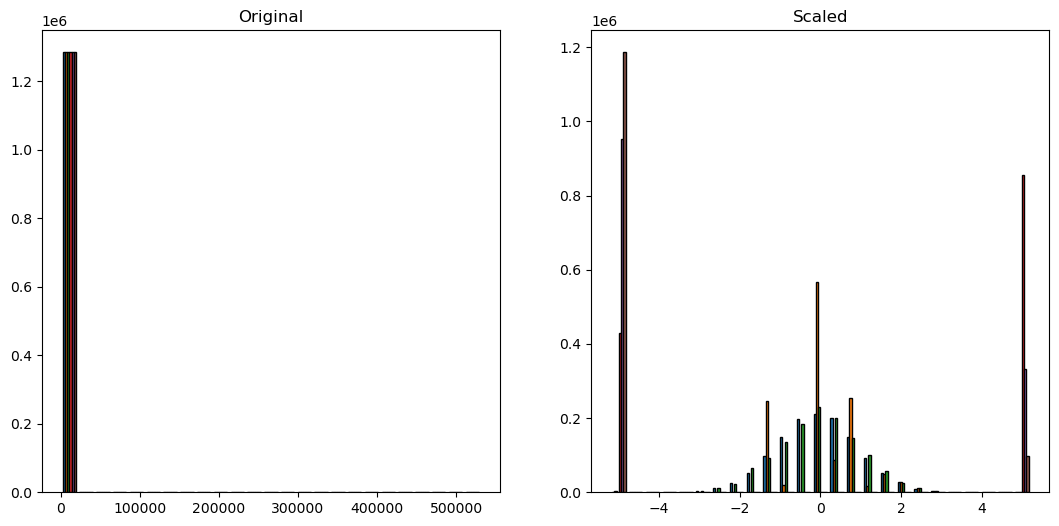

In [25]:
#quantile transformer with normal output distribution

scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled');

4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


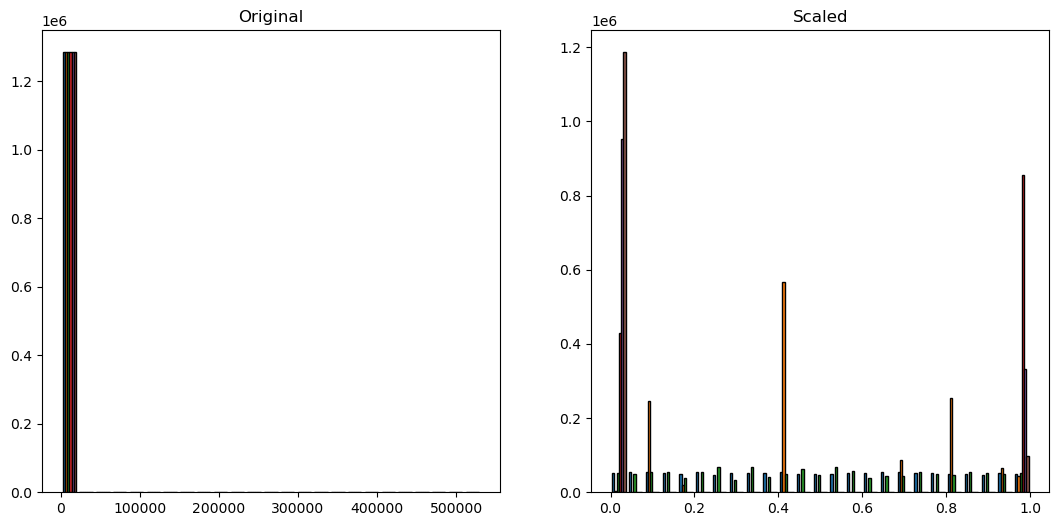

In [26]:
#quantile transformer with default output distribution

scaler = sklearn.preprocessing.QuantileTransformer()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled');

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [6]:
def prepare_zillow(train, validate, test):

    #encode for modeling
    train = pd.concat([train, pd.get_dummies(train["county"])], axis=1)
    validate = pd.concat([validate, pd.get_dummies(validate["county"])], axis=1)
    test = pd.concat([test, pd.get_dummies(test["county"])], axis=1)

    # Drop the original 'county' column
    train = train.drop("county", axis=1)
    validate = validate.drop("county", axis=1)
    test = test.drop("county", axis=1)

    #rename for modeling
    train.rename(columns={"LA": "los_angeles", "Orange": "orange", "Ventura": "ventura"},
        inplace=True)

    validate.rename(columns={"LA": "los_angeles", "Orange": "orange", "Ventura": "ventura"},
        inplace=True)

    test.rename(columns={"LA": "los_angeles", "Orange": "orange", "Ventura": "ventura"},
        inplace=True)

    return train, validate, test

In [8]:
train, validate, test = prepare_zillow(train, validate, test)

In [10]:
train.head()

,bedrooms,bathrooms,square_feet,home_value,yearbuilt,tax,los_angeles,orange,ventura
462820,5,4.0,3011,710674.0,2005,7561.14,False,False,True
3880,3,2.0,1682,603333.0,1961,7086.19,True,False,False
992263,4,2.0,1433,82804.0,1954,1134.83,True,False,False
311722,3,2.5,2001,355444.0,1999,4174.92,False,False,True
787985,4,2.0,2277,571000.0,1962,7113.02,True,False,False


In [9]:
def qt_scaler(train, validate, test):
    
    #set X and Y variables
    X_train, X_validate, X_test = train[['square_feet', 'bathrooms','yearbuilt', 'los_angeles','orange','ventura']],\
                                  validate[['square_feet','bathrooms', 'yearbuilt', 'los_angeles', 'orange','ventura']],\
                                  test[['square_feet','bathrooms', 'yearbuilt', 'los_angeles', 'orange','ventura']]
    y_train, y_validate, y_test = train.home_value, validate.home_value, test.home_value


    #quantile transformer with normal output distribution

    scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
    # Note that we only call .fit with the training data,
    # but we use .transform to apply the scaling to all the data splits.
    scaler.fit(X_train)

    #set scaled variables
    X_train_scaled = scaler.transform(X_train)
    X_validate_scaled = scaler.transform(X_validate)
    X_test_scaled = scaler.transform(X_test)

    #plot it
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(X_train, bins=25, ec='black')
    plt.title('Original')
    plt.subplot(122)
    plt.hist(X_train_scaled, bins=25, ec='black')
    plt.title('Scaled');
    
    return X_train_scaled, X_validate_scaled, X_test_scaled

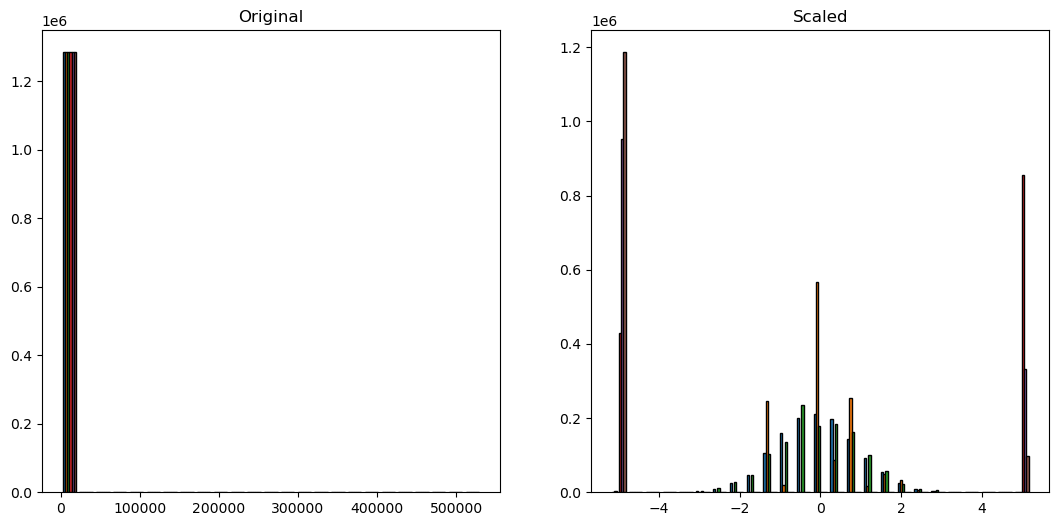

In [12]:
X_train_scaled, X_validate_scaled, X_test_scaled = qt_scaler(train, validate, test)